# Cyber Security Breaches

### Introduction
The dataset provides insights into common cyber security breaches in the US from 2004-2022, encompassing information on the organization affected, the sector of the breach, the method of the breach, the narrative of the incident, the data sensitivity level and the number of records lost.

### Methodology

1. **Data Loading**: Begin with importing the necessary libraries and loading the data into a pandas dataframe.
2. **Exploratory Data Analysis (EDA)**: Understand the basic structure of the dataset and visualize frequency distributions.
3. **Natural Language Processing (NLP)**: Process textual data in the 'story' column to identify common themes and patterns.
4. **Recommendations**: Deduce recommendations based on our analysis

### 1. Setup & Data Loading

In [26]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

In [25]:
# Load Data
df = pd.read_csv('~/Downloads/data_breaches_cleaned.csv')
df.head()

,Unnamed: 0,organisation,records lost,year,story,sector,method,data sensitivity
0,1,Plex,"15,000,000",2022,"Intruders access password data, usernames, and...",web,hacked,1
1,2,Twitter,"5,400,000",2021,Zero day vulnerability allowed a threat actor ...,web,hacked,2
2,3,Shanghai Police,"500,000,000",2022,A database containing records of over a billio...,financial,hacked,5
3,4,"City of Amagasaki, Japan","500,000",2022,An unnamed government official lost his bag af...,government,oops!,3
4,5,Dubai Real Estate Leak,"800,000",2022,"Data leak exposes how criminals, officials, an...",financial,inside job,1


In [33]:
# Drop 'Unnamed: 0' column
df = df.drop(columns=['Unnamed: 0'])



In [34]:
df.head()

,organisation,records lost,year,story,sector,method,data sensitivity
0,Plex,"15,000,000",2022,"Intruders access password data, usernames, and...",web,hacked,1
1,Twitter,"5,400,000",2021,Zero day vulnerability allowed a threat actor ...,web,hacked,2
2,Shanghai Police,"500,000,000",2022,A database containing records of over a billio...,financial,hacked,5
3,"City of Amagasaki, Japan","500,000",2022,An unnamed government official lost his bag af...,government,oops!,3
4,Dubai Real Estate Leak,"800,000",2022,"Data leak exposes how criminals, officials, an...",financial,inside job,1


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   organisation      416 non-null    object
 1   records lost      416 non-null    object
 2   year              416 non-null    int64 
 3   story             411 non-null    object
 4   sector            416 non-null    object
 5   method            416 non-null    object
 6   data sensitivity  416 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 22.9+ KB


In [38]:
df.shape

(416, 7)

In [39]:
df.describe()

,year,data sensitivity
count,416.000000,416.000000
mean,2015.201923,2.338942
std,4.303274,1.235235
min,2004.000000,1.000000
25%,2012.000000,1.000000
50%,2016.000000,2.000000
75%,2019.000000,3.000000
max,2022.000000,5.000000


**Data Loading and Initial Exploration:**

Insight: Ensure the data is regularly updated to capture the most recent breaches for real-time risk assessment.

### 2. Exploratory Analysis

In [4]:
# Get index counts for 'year', 'sector' and 'method'
year_order = df['year'].value_counts().index
sector_order = df['sector'].value_counts().index
method_order = df['method'].value_counts().index

print(year_order)
print(sector_order)
print(method_order)

Int64Index([2019, 2018, 2011, 2013, 2016, 2021, 2020, 2017, 2015, 2012, 2008,
            2014, 2010, 2022, 2007, 2009, 2006, 2005, 2004],
           dtype='int64')
Index(['web', 'government', 'health ', 'finance', 'retail', 'telecoms', 'app',
       'tech', 'transport', 'gaming', 'academic', 'misc', 'financial',
       'military', 'tech, web', 'web ', 'tech, retail', 'tech, health',
       'misc, health', 'tech, app', 'web, tech', 'legal', 'government, health',
       'web, military', 'NGO', 'military, health', 'web, gaming',
       'government, military'],
      dtype='object')
Index(['hacked', 'poor security', 'lost device ', 'oops!', 'inside job',
       'poor security ', 'lost device'],
      dtype='object')


2019    45
2018    41
2011    37
2013    35
2016    33
2021    33
2020    28
2017    25
2015    25
2012    23
2008    19
2014    19
2010    13
2022    12
2007    10
2009     9
2006     5
2005     3
2004     1
Name: year, dtype: int64


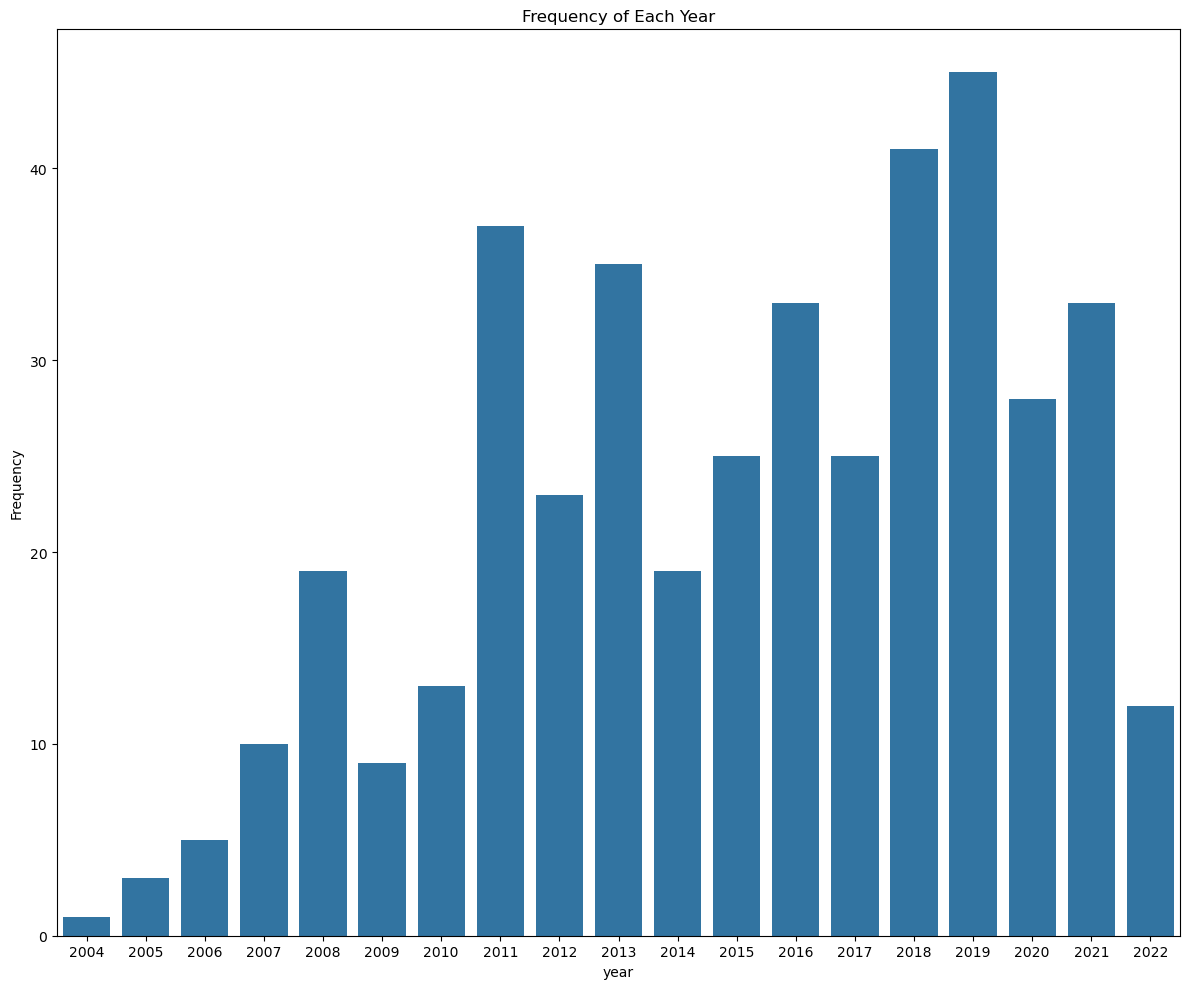

In [9]:
# Get counts for 'year'
year_counts = df['year'].value_counts()
print(year_counts)

# Plotting
plt.figure(figsize=(12, 10))
sns.barplot(x=year_counts.index, y=year_counts.values, color=sns.color_palette()[0])
plt.title('Frequency of Each Year')
plt.xlabel('year')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**Time Series Insights:**

Insight: The years 2019 and 2018 had the highest reported breaches. As a cybersecurity company, understanding what external factors or shifts in the digital landscape during these years could help predict future risk periods.

web                     108
government               44
health                   43
finance                  39
retail                   37
telecoms                 22
app                      21
tech                     19
transport                17
gaming                   16
academic                 11
misc                     10
financial                 5
military                  4
tech, web                 4
web                       3
tech, retail              2
tech, health              1
misc, health              1
tech, app                 1
web, tech                 1
legal                     1
government, health        1
web, military             1
NGO                       1
military, health          1
web, gaming               1
government, military      1
Name: sector, dtype: int64


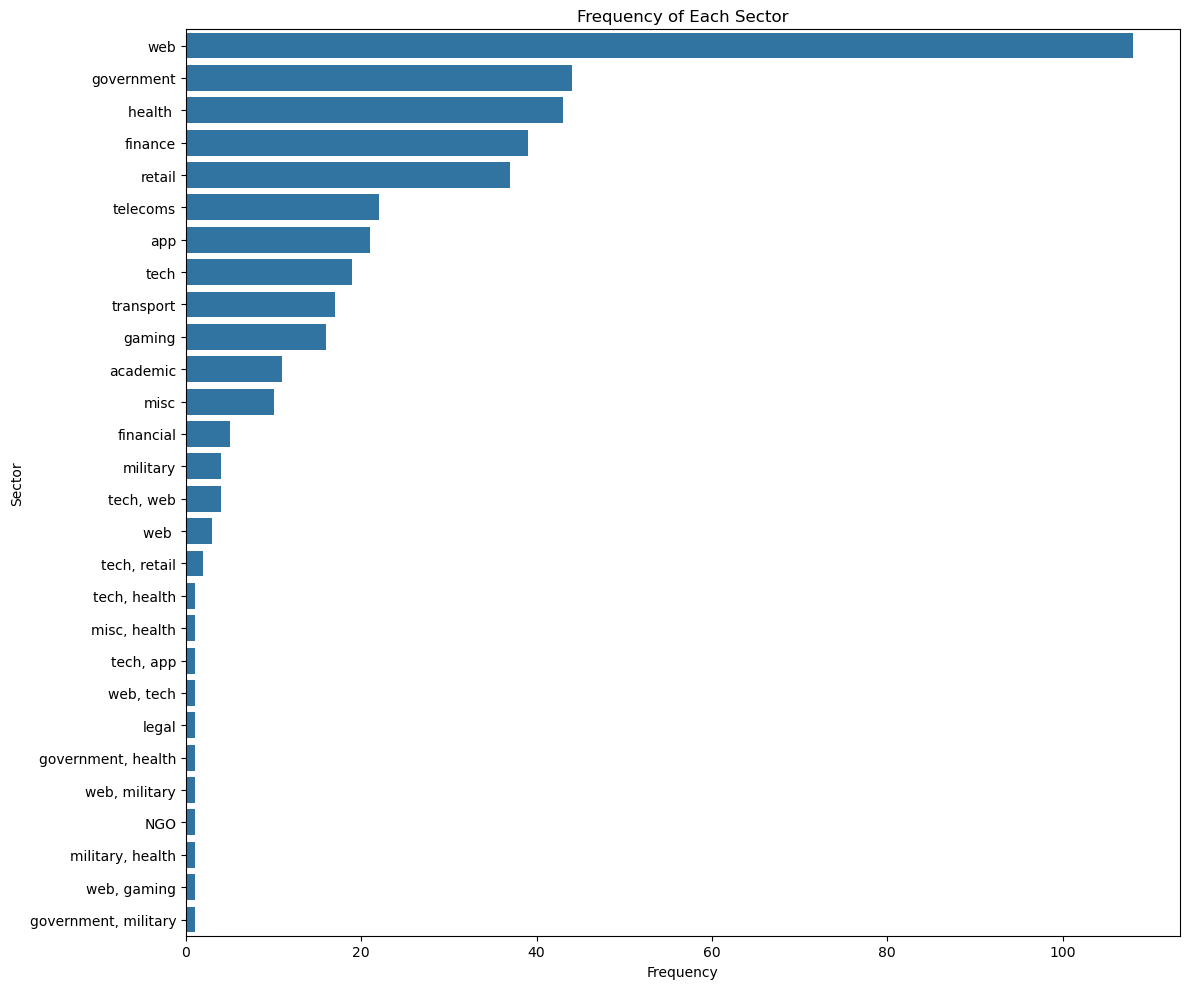

In [8]:
# Get counts for 'sector'
sector_counts = df['sector'].value_counts()
print(sector_counts)

# Plotting
plt.figure(figsize=(12, 10))
sns.barplot(x=sector_counts.values, y=sector_counts.index, color=sns.color_palette()[0])
plt.title('Frequency of Each Sector')
plt.xlabel('Frequency')
plt.ylabel('Sector')
plt.tight_layout()
plt.show()

**Sector-wise Distribution of Breaches:**

Insight: The 'web' sector stands out with the highest number of breaches. Firms operating in or providing services to this sector should be more vigilant and consider enhancing their cybersecurity measures. Additionally, sectors like 'government', 'health', and 'finance' are also more prone to breaches and need attention.

hacked            274
poor security      48
lost device        47
oops!              22
inside job         20
poor security       4
lost device         1
Name: method, dtype: int64


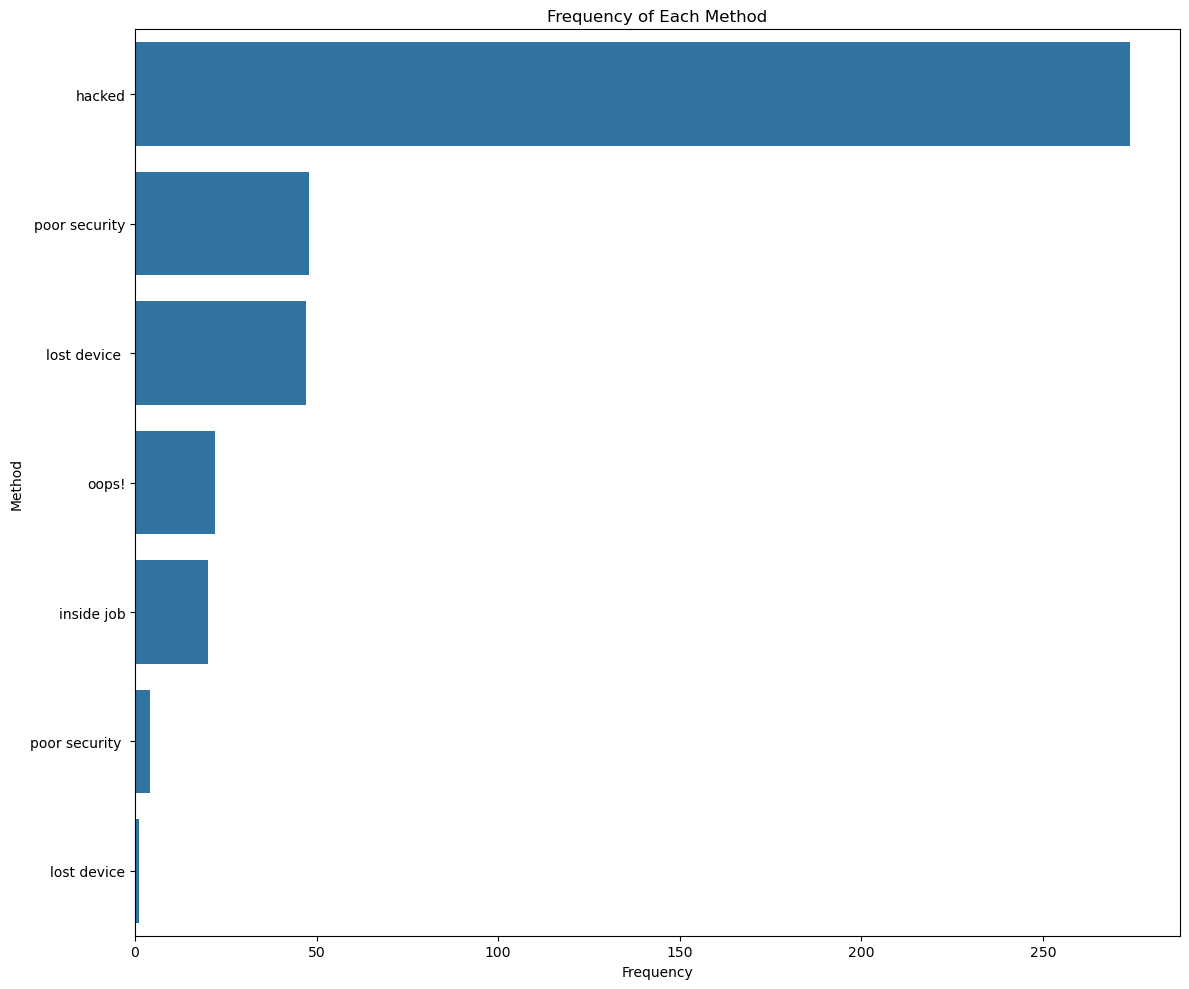

In [10]:
# Get counts for 'method'
method_counts = df['method'].value_counts()
print(method_counts)

#Plotting
plt.figure(figsize=(12, 10))
sns.barplot(x=method_counts.values, y=method_counts.index, color=sns.color_palette()[0])
plt.title('Frequency of Each Method')
plt.xlabel('Frequency')
plt.ylabel('Method')
plt.tight_layout()
plt.show()

**Method-wise Distribution of Breaches:**

Insight: The primary method of breach is 'hacked', suggesting that organizations need to prioritize intrusion prevention, detection, and timely response. Enhancing staff training and considering regular penetration testing can reduce this risk.

### 3. Natural Language Processing (NLP) for Breach Narratives

##### a. Tokenization and Stopwords Removal

In [15]:
import nltk
import string
from collections import Counter
from nltk.corpus import stopwords 

nltk.download('stopwords')
ENGLISH_STOP_WORDS = stopwords.words('english')

def my_tokenizer(text):
    """
    Tokenizer function. Lowers all characters, splits by whitespace, and removes stop words.

    INPUT: single string
    OUTPUT: list of strings, the tokenized input.
    """
    
    # Remove punctuation and set to lower case
    for punctuation_mark in string.punctuation:
        text = text.replace(punctuation_mark,'').lower()

    # Split text into words
    listofwords = text.split()
    listof_filtered_words = []
    
    # Remove stopwords and any tokens that are just empty strings
    for word in listofwords:
        if (not word in ENGLISH_STOP_WORDS) and (word != ''):
            listof_filtered_words.append(word)

    return listof_filtered_words


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/markbenhaim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##### b. Most Common Words in Breach Narratives

In [16]:
# Convert NaN values to an empty string and ensure each entry is a string
df['story'] = df['story'].fillna('').astype(str)

# Then apply the tokenizer
df['tokenized_story'] = df['story'].apply(my_tokenizer)

In [17]:
# Tokenize and aggregate all words
all_words = df['story'].apply(my_tokenizer).explode()

# Count occurrences
word_counts = all_words.value_counts()

# Display top 30
print(word_counts.head(30))

data           128
addresses      119
information    110
numbers         95
names           85
details         84
email           81
passwords       78
stolen          77
million         75
personal        71
online          61
security        58
records         56
hacked          51
database        49
hackers         48
containing      46
social          41
card            41
including       40
birth           39
breach          38
exposed         37
users           37
phone           37
account         37
dates           36
web             35
websites        35
Name: story, dtype: int64


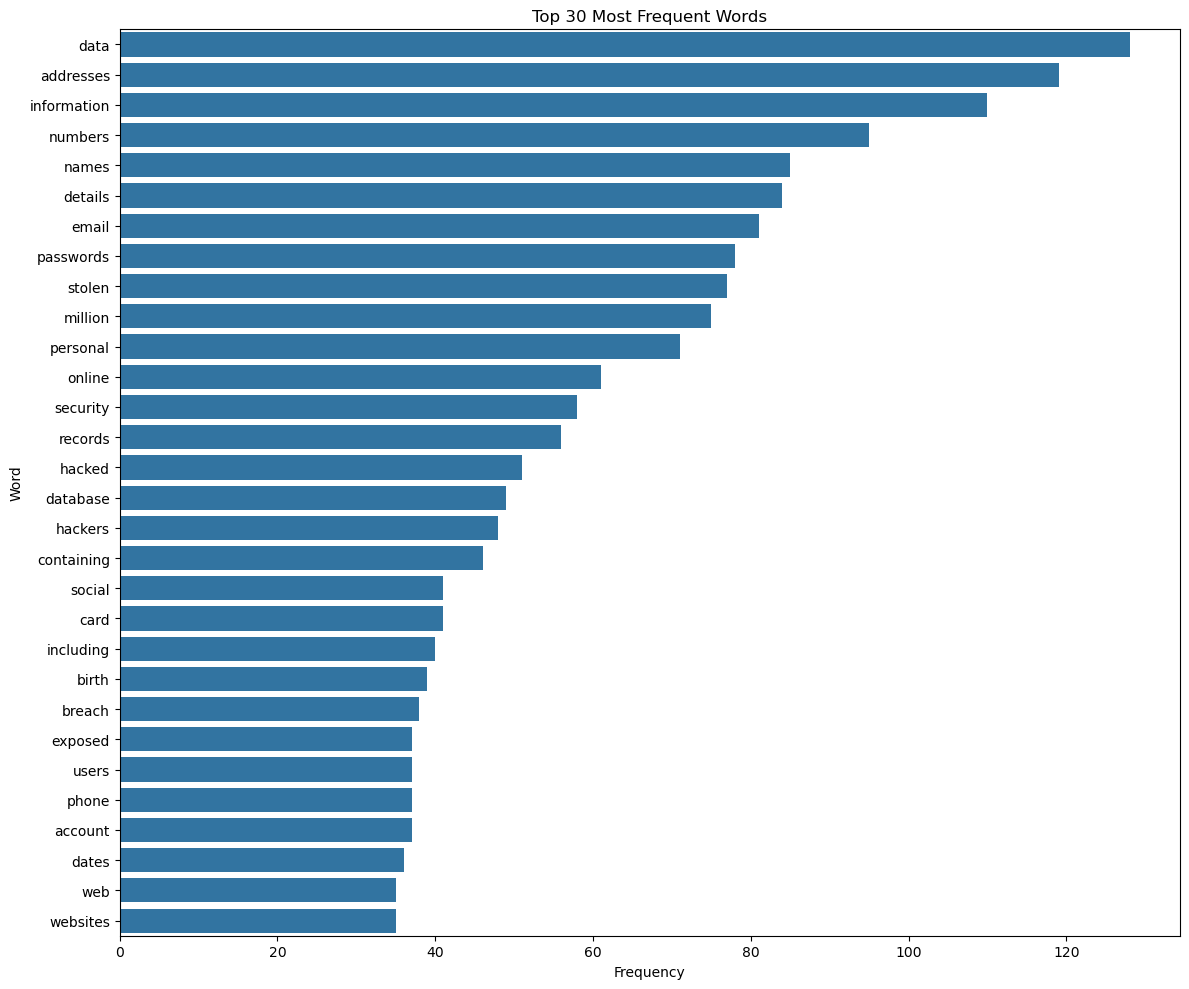

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming word_counts is already calculated as before
top_30_words = word_counts.head(30)

# Plotting
plt.figure(figsize=(12, 10))
sns.barplot(x=top_30_words.values, y=top_30_words.index, color=sns.color_palette()[0])
plt.title('Top 30 Most Frequent Words')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.tight_layout()
plt.show()


**Text Analysis using NLP:**

Narrative Analysis:
Insight: The words like "data", "addresses", "information", and "passwords" frequently appear in the narratives. This underscores the value of these data types to attackers and emphasizes the need for organizations to better protect such sensitive information. Multi-factor authentication, encryption, and better password policies can help mitigate risks.

#### Organizations with Most Records Lost:

Understanding which organizations lost the most records can give an insight into the magnitude of breaches and their potential impact.

In [24]:
# Group by 'organisation' and sum the 'records lost'
org_records_sum = df.groupby('organisation')['records lost'].sum()

# Sort the results in descending order and pick the top 20
top_20_orgs = org_records_sum.sort_values(ascending=False).head(20)

top_20_orgs.head(20)


organisation
Yahoo                     1082000000
Facebook                  1037000000
Linkedin                   700000000
Aadhaar                    550000000
Spambot                    520000000
Syniverse                  500000000
Shanghai Police            500000000
Friend Finder Network      412000000
Marriott International     383000000
OxyData                    380000000
River City Media           340000000
Twitter                    335650000
Indian citizens            275265298
Microsoft                  250000000
Experian Brazil            220000000
Chinese resume leak        202000000
Court Ventures             200000000
Apollo                     200000000
Deep Root Analytics        198000000
VK                         171000000
Name: records lost, dtype: int64

**Organization-specific Insights:**

Insight: Companies like Yahoo, Facebook, and LinkedIn have faced massive breaches, affecting billions of records. Organizations of such scale should consider investing in advanced cybersecurity solutions, run periodic audits, and be prepared for potential PR crises related to data breaches.

### 4. Recommendations

**General Recommendations:**

- Segregate sensitive data and apply the principle of least privilege; users should only have access to data they need.
- Regularly backup data and ensure that backup mechanisms are not connected to the main systems, preventing potential ransomware attacks from corrupting backups.
- Periodic third-party security audits can provide an external viewpoint and help identify vulnerabilities that might be overlooked internally.
- Implement and regularly update a comprehensive cybersecurity policy, ensuring it covers the latest threats and methods used by attackers.
- Ensure proper monitoring tools are in place and that they generate alerts for suspicious activities. Timely response can mitigate potential damage.
- Regular training sessions for employees, making them aware of the latest phishing techniques, safe browsing practices, and the importance of strong, unique passwords.
